# Рубежный контроль №1


## Толкачев Родион РТ5-61Б

### Вариант 21

#### <b>Задача</b>

Для заданного набора данных произведите масштабирование данных (для одного признака) и преобразование категориальных признаков в количественные двумя способами (label encoding, one hot encoding) для одного признака. Какие методы Вы использовали для решения задачи и почему?

#### <b>Датасет</b>

https://www.kaggle.com/mohansacharya/graduate-admissions (файл Admission_Predict.csv)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")
data = pd.read_csv('data/Admission_Predict.csv', sep=",")
data.head(10)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68
8,9,302,102,1,2.0,1.5,8.00,0,0.50
9,10,323,108,3,3.5,3.0,8.60,0,0.45


Проведем масштабирование параметра GRE Score

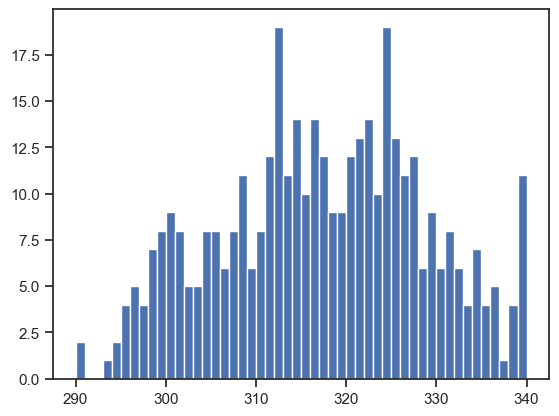

In [3]:
from sklearn.preprocessing import MinMaxScaler
# Сначала посмотрим, как сработает МинМакс масштабирование
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[['GRE Score']])
plt.hist(data['GRE Score'], 50)
plt.show()

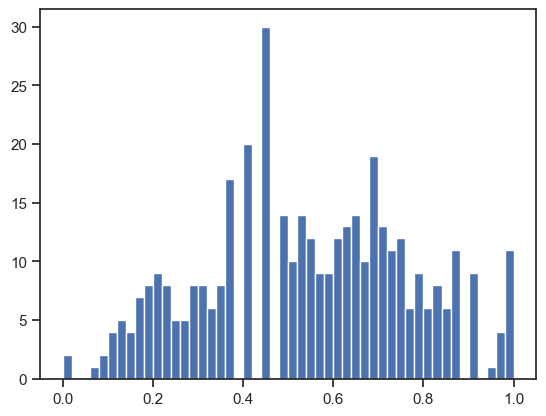

In [4]:
plt.hist(scaled_data, 50) 
plt.show()

Для решения задачи я использовал MinMax масштабирование. На самом деле данный датасет не особо преднезначен для масштабирования, т.к. здесь просто представлены ряды чисел, которые уже находятся в относительно узком и логичном диапозоне. Но для улучшения сходимости алгоритма оптимизации я использовал данный метод

Теперь произведём преобразование категориальных признаков в количественные двумя способами - University Rating и one hot encoding для признака. Поскольку в данном датасете нет категориальных признаков, я сперва положу, что столбец 'hue' является категориальным

In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# Применим LabelEncoder
le = LabelEncoder()
data = pd.read_csv('data/Admission_Predict.csv', sep=",")
data['University Rating'] = le.fit_transform(data['University Rating'])

np.unique(data['University Rating'])

array([0, 1, 2, 3, 4], dtype=int64)

In [6]:
ohe = OneHotEncoder()
data_ohe = ohe.fit_transform(data[['University Rating']])
data_ohe.todense()[0:10]

matrix([[0., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 1.],
        [0., 0., 1., 0., 0.],
        [0., 1., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0.]])

Теперь рассмотрим датасет с настоящими категориальными признаками. Я возьму датасет из второй лабораторной работы и в качестве этого признака возьму 

In [10]:
data2 = pd.read_csv('../lab2/data/train.csv', sep=",")
data2_le =le.fit_transform(data2['Cabin'])
np.unique(data2_le)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147])

In [11]:
data_ohe = ohe.fit_transform(data2[['Cabin']])
data_ohe.todense()[0:10]

matrix([[0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 1.],
        ...,
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 1.]])

Выбор способа преобразования зависит от того, каким методом мы в дальнейшем собираемся обучать систему.

Дополнительное задание - Для студентов группы РТ5-61Б - для пары произвольных колонок данных построить график "Jointplot".

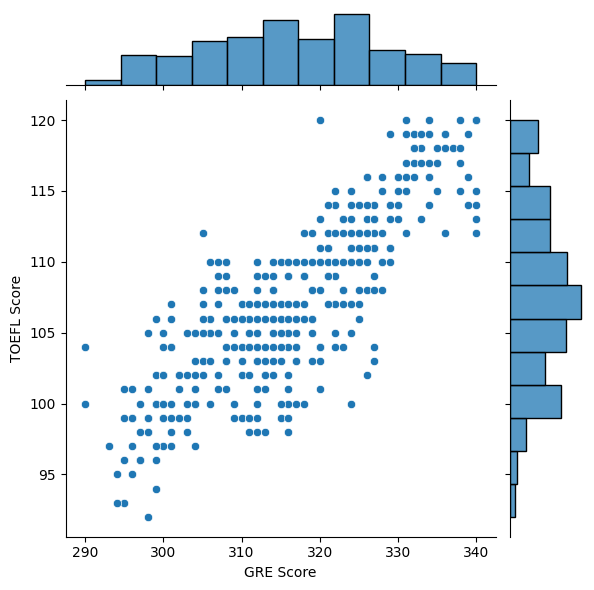

In [14]:
import seaborn as sns
sns.jointplot(x='GRE Score', y='TOEFL Score', data=data, kind='scatter')